In [1]:
pip install ultralytics==8.3.13

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 870.5/870.5 kB 21.8 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip show ultralytics

Name: ultralytics
Version: 8.3.13
Summary: Ultralytics YOLO for SOTA object detection, multi-object tracking, instance segmentation, pose estimation and image classification.
Home-page: 
Author: 
Author-email: Glenn Jocher <glenn.jocher@ultralytics.com>, Jing Qiu <jing.qiu@ultralytics.com>
License: AGPL-3.0
Location: /opt/conda/lib/python3.10/site-packages
Requires: matplotlib, numpy, opencv-python, pandas, pillow, psutil, py-cpuinfo, pyyaml, requests, scipy, seaborn, torch, torchvision, tqdm, ultralytics-thop
Required-by: 


In [3]:
import os 
import matplotlib
import numpy
import cv2
import pandas
import PIL
import psutil
import cpuinfo
import yaml
import requests
import scipy
import seaborn
import torch
import torchvision
import tqdm
import ultralytics

print("All libraries imported successfully!")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
All libraries imported successfully!


In [4]:
from ultralytics import YOLO
model = YOLO("yolo11n.pt")

100%|██████████| 5.35M/5.35M [00:00<00:00, 109MB/s]


In [5]:
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C3k2(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_

In [6]:
model.info()

YOLO11n summary: 319 layers, 2,624,080 parameters, 0 gradients, 6.6 GFLOPs


(319, 2624080, 0, 6.614336)

In [7]:
# Count convolutional layers
conv_layers = 0
for name, layer in model.named_modules():
    if isinstance(layer, torch.nn.Conv2d):
        conv_layers += 1

print(f"Total Convolutional Layers: {conv_layers}")

Total Convolutional Layers: 88


In [16]:
pytorch_model = model.model

# Access the detection head (usually the last layer)
detect_head = pytorch_model.model[-1]

# Count convolutional layers in the detection head
conv_layers = 0
for name, layer in detect_head.named_modules():
    if isinstance(layer, torch.nn.Conv2d):
        conv_layers += 1

print(f"Convolutional Layers in Detection Head: {conv_layers}")

Convolutional Layers in Detection Head: 25


## Total Convolutional Layers
    Backbone & Neck: 63

    Detection Head: 25

    Total: 88

## Instead of using fully connected layers, **YOLO uses 1x1 convolutional layers** to predict bounding boxes, objectness scores, and class probabilities.

# Look for 1x1 Convolutional Layers

In [9]:
# Iterate through the detection head layers
for name, layer in detect_head.named_modules():
    if isinstance(layer, torch.nn.Conv2d):
        print(f"Layer: {name} | Type: {type(layer)} | Kernel Size: {layer.kernel_size}")

Layer: cv2.0.0.conv | Type: <class 'torch.nn.modules.conv.Conv2d'> | Kernel Size: (3, 3)
Layer: cv2.0.1.conv | Type: <class 'torch.nn.modules.conv.Conv2d'> | Kernel Size: (3, 3)
Layer: cv2.0.2 | Type: <class 'torch.nn.modules.conv.Conv2d'> | Kernel Size: (1, 1)
Layer: cv2.1.0.conv | Type: <class 'torch.nn.modules.conv.Conv2d'> | Kernel Size: (3, 3)
Layer: cv2.1.1.conv | Type: <class 'torch.nn.modules.conv.Conv2d'> | Kernel Size: (3, 3)
Layer: cv2.1.2 | Type: <class 'torch.nn.modules.conv.Conv2d'> | Kernel Size: (1, 1)
Layer: cv2.2.0.conv | Type: <class 'torch.nn.modules.conv.Conv2d'> | Kernel Size: (3, 3)
Layer: cv2.2.1.conv | Type: <class 'torch.nn.modules.conv.Conv2d'> | Kernel Size: (3, 3)
Layer: cv2.2.2 | Type: <class 'torch.nn.modules.conv.Conv2d'> | Kernel Size: (1, 1)
Layer: cv3.0.0.0.conv | Type: <class 'torch.nn.modules.conv.Conv2d'> | Kernel Size: (3, 3)
Layer: cv3.0.0.1.conv | Type: <class 'torch.nn.modules.conv.Conv2d'> | Kernel Size: (1, 1)
Layer: cv3.0.1.0.conv | Type: <c

YO

<hr>


image 1/1 /kaggle/input/image-for-predict/422946657_1843239819427840_4190706023266226446_n.jpg: 640x512 1 person, 42.4ms
Speed: 11.5ms preprocess, 42.4ms inference, 231.5ms postprocess per image at shape (1, 3, 640, 512)


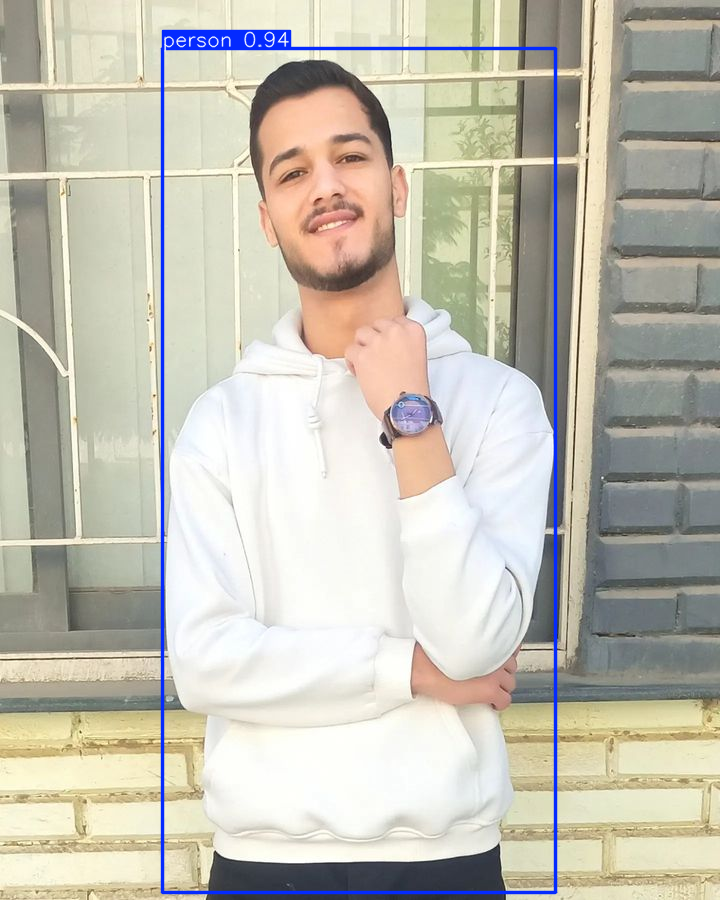

In [10]:
results = model('/kaggle/input/image-for-predict')
results[0].show()

In [11]:
# Display the results
for result in results:
    # Each result corresponds to one image
    detections = result.boxes  # Accessing the detections

    # Loop through each detection
    for detection in detections:
        # Get the class ID and confidence score
        class_id = detection.cls[0]  # Class ID
        confidence = detection.conf[0]  # Confidence score
        coordinates = detection.xyxy[0]  # Bounding box coordinates
        
        print(f'Class ID: {class_id}, Confidence: {confidence}, Coordinates: {coordinates}')


Class ID: 0.0, Confidence: 0.9423081278800964, Coordinates: tensor([162.3627,  48.2279, 555.9789, 892.9985], device='cuda:0')


# Define the new content for data.yaml

In [12]:
new_data_yaml_content = """
train: /kaggle/input/drowsiness-detection-for-yolov8/train/images
val: /kaggle/input/drowsiness-detection-for-yolov8/valid/images
test: /kaggle/input/drowsiness-detection-for-yolov8/test/images

nc: 3
names: ["Drowsiness", "awake", "yawn"]
"""

# Create a new directory for the modified data.yaml file
new_data_yaml_dir = '/kaggle/working/drowsiness-detection'
os.makedirs(new_data_yaml_dir, exist_ok=True)

# Path to the new data.yaml file
new_data_yaml_path = os.path.join(new_data_yaml_dir, 'data.yaml')

# Save the new content to the new data.yaml file
with open(new_data_yaml_path, 'w') as file:
    file.write(new_data_yaml_content)


In [13]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# move model to cuda
model.to(device)
print(device)

cuda


<hr>

# train model

In [14]:
# Train the model with specific hyperparameters
model.train(
    data='/kaggle/working/drowsiness-detection/data.yaml',  # Path to dataset config
    epochs=100,                                             # Number of epochs
    batch=128,                                               # Batch size
    imgsz=640,                                              # Image size
    project='GP',                                           # Project name
    name='train_n_3',                                       # Run name
    pretrained=True,                                        # Use pre-trained weights
    optimizer='auto',                                       # Automatic optimizer selection
    freeze= 11,                                             # Freeze first 120 layers (adjust as needed)
    save=True,                                              # Save checkpoints
    patience=10,                                            # Early stopping patience
    val=True,                                               # Validate during training
    dropout=0.1,                                            # Dropout rate
    device=device,                                          # Use GPU if available
    seed=0                                                  # Random seed for reproducibility
)

New https://pypi.org/project/ultralytics/8.3.63 available 😃 Update with 'pip install -U ultralytics'
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/kaggle/working/drowsiness-detection/data.yaml, epochs=100, time=None, patience=10, batch=128, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=GP, name=train_n_3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=11, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.1, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show

100%|██████████| 755k/755k [00:00<00:00, 27.2MB/s]
2025-01-19 18:30:00,948	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-01-19 18:30:01,429	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.0.conv.weight'
Freezing layer 'model.0.bn.weight'
Freezing layer 'model.0.bn.bias'
Freezing layer 'model.1.conv.weight'
Freezing layer 'model.1.bn.weight'
Freezing layer 'model.1.bn.bias'
Freezing layer 'model.2.cv1.conv.weight'
Freezing layer 'model.2.cv1.bn.weight'
Freezing layer 'model.2.cv1.bn.bias'
Freezing layer 'model.2.cv2.conv.weight'
Freezing layer 'model.2.cv2.bn.weight'
Freezing layer 'model.2.cv2.bn.bias'
Freezing layer 'model.2.m.0.cv1.conv.weight'
Freezing layer 'model.2.m.0.cv1.bn.weight'
Freezing layer 'model.2.m.0.cv1.bn.bias'
Freezing layer 'model.2.m.0.cv2.conv.weight'
Freezing layer 'model.2.m.0.cv2.bn.weight'
Freezing layer 'model.2.m.0.cv2.bn.bias'
Freezing layer 'model.3.conv.weight'
Freezing layer 'model.3.bn.weight'
Freezing layer 'model.3.bn.bias'
Freezing layer 'model.4.cv1.conv.weight'
Freezing layer 'model.4.cv1.bn.weight'
Freezing layer 'model.4.cv1.bn.bias'
Freezing layer 'model.4.cv2.conv.weight'
Freezing layer 'model.4.cv2.bn.weig

train: Scanning /kaggle/input/drowsiness-detection-for-yolov8/train/labels... 12513 images, 27 backgrounds, 0 corrupt: 100%|██████████| 12513/12513 [00:52<00:00, 239.03it/s]


train: WARNING ⚠️ Cache directory /kaggle/input/drowsiness-detection-for-yolov8/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/opt/conda/lib/python3.10/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 2.0.0 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /kaggle/input/drowsiness-detection-for-yolov8/valid/labels... 1191 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1191/1191 [00:05<00:00, 220.73it/s]


val: WARNING ⚠️ Cache directory /kaggle/input/drowsiness-detection-for-yolov8/valid is not writeable, cache not saved.
Plotting labels to GP/train_n_3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.001), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to GP/train_n_3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      9.73G      1.819      2.973      1.859        217        640: 100%|██████████| 98/98 [02:05<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:09<00:00,  1.90s/it]


                   all       1191       1190      0.562      0.837      0.639      0.415

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      8.76G      1.174      1.616      1.263        205        640: 100%|██████████| 98/98 [02:04<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.61s/it]


                   all       1191       1190      0.808      0.805       0.85      0.646

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      8.77G      1.052      1.167      1.168        222        640: 100%|██████████| 98/98 [02:10<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.61s/it]

                   all       1191       1190      0.751      0.862      0.872      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      8.76G     0.9732     0.9522      1.117        230        640: 100%|██████████| 98/98 [02:06<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.62s/it]

                   all       1191       1190      0.784      0.876      0.896      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      8.76G     0.9162     0.8375      1.089        228        640: 100%|██████████| 98/98 [02:05<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.53s/it]

                   all       1191       1190      0.879      0.911      0.952       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      8.76G     0.8803     0.7652      1.069        230        640: 100%|██████████| 98/98 [02:03<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.55s/it]

                   all       1191       1190       0.92      0.912      0.968      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      8.76G     0.8463      0.719      1.054        220        640: 100%|██████████| 98/98 [02:09<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.49s/it]

                   all       1191       1190      0.922       0.92      0.968      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      8.76G     0.8283     0.6945      1.047        210        640: 100%|██████████| 98/98 [02:06<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.55s/it]

                   all       1191       1190      0.897      0.894      0.963      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      8.76G     0.8137     0.6683      1.039        232        640: 100%|██████████| 98/98 [02:05<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.56s/it]

                   all       1191       1190      0.915      0.929      0.972      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      8.76G     0.7953     0.6422      1.031        216        640: 100%|██████████| 98/98 [02:07<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.43s/it]

                   all       1191       1190      0.874      0.922      0.962      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      8.76G      0.782      0.635      1.023        207        640: 100%|██████████| 98/98 [02:04<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.53s/it]

                   all       1191       1190      0.918      0.924       0.97      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      8.76G     0.7681     0.6217      1.014        223        640: 100%|██████████| 98/98 [02:04<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.50s/it]

                   all       1191       1190      0.902      0.934       0.97       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      8.76G     0.7656     0.6169      1.018        228        640: 100%|██████████| 98/98 [02:07<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.61s/it]

                   all       1191       1190      0.926      0.933      0.973      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      8.76G     0.7512     0.5987      1.009        219        640: 100%|██████████| 98/98 [02:03<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.39s/it]

                   all       1191       1190       0.91      0.949      0.975      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      8.76G     0.7419     0.5958      1.008        223        640: 100%|██████████| 98/98 [02:06<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.44s/it]

                   all       1191       1190       0.93      0.934      0.974      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      8.76G     0.7378     0.5866      1.004        224        640: 100%|██████████| 98/98 [02:04<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.58s/it]

                   all       1191       1190      0.931      0.932      0.977      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      8.76G     0.7281     0.5823      1.001        210        640: 100%|██████████| 98/98 [02:07<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.37s/it]

                   all       1191       1190      0.934       0.93      0.977      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      8.76G     0.7227     0.5715     0.9994        232        640: 100%|██████████| 98/98 [02:04<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.57s/it]

                   all       1191       1190      0.946      0.933      0.979      0.838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      8.76G     0.7211     0.5718     0.9985        208        640: 100%|██████████| 98/98 [02:03<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.60s/it]

                   all       1191       1190      0.921      0.951       0.98      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      8.76G     0.7126     0.5599     0.9942        230        640: 100%|██████████| 98/98 [02:03<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.65s/it]

                   all       1191       1190      0.947      0.935      0.976      0.837



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      8.76G     0.7128     0.5577     0.9956        223        640: 100%|██████████| 98/98 [02:02<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.54s/it]

                   all       1191       1190      0.942      0.933      0.978      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      8.76G     0.7017     0.5553     0.9896        235        640: 100%|██████████| 98/98 [02:03<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.40s/it]

                   all       1191       1190      0.906      0.951      0.978      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      8.76G     0.7014      0.553     0.9911        218        640: 100%|██████████| 98/98 [02:03<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.45s/it]

                   all       1191       1190       0.94      0.933      0.977      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      8.76G     0.6993     0.5494     0.9887        225        640: 100%|██████████| 98/98 [02:02<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.56s/it]

                   all       1191       1190      0.942      0.937      0.978      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      8.76G      0.697     0.5429     0.9876        218        640: 100%|██████████| 98/98 [02:06<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.43s/it]

                   all       1191       1190      0.922       0.93      0.976      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      8.76G     0.6881     0.5344      0.984        207        640: 100%|██████████| 98/98 [02:03<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.53s/it]

                   all       1191       1190      0.942      0.936      0.978      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      8.76G     0.6882     0.5395     0.9856        221        640: 100%|██████████| 98/98 [02:21<00:00,  1.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:05<00:00,  1.18s/it]

                   all       1191       1190      0.942      0.945       0.98      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      8.76G     0.6825     0.5244     0.9824        221        640: 100%|██████████| 98/98 [02:09<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.47s/it]

                   all       1191       1190       0.94      0.928      0.976      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      8.76G     0.6758     0.5295     0.9791        226        640: 100%|██████████| 98/98 [02:05<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.39s/it]

                   all       1191       1190      0.951      0.924      0.978      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      8.76G     0.6766     0.5308     0.9783        217        640: 100%|██████████| 98/98 [02:04<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.56s/it]

                   all       1191       1190      0.927      0.938      0.977      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      8.76G     0.6751     0.5218     0.9784        238        640: 100%|██████████| 98/98 [02:04<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.51s/it]

                   all       1191       1190      0.941      0.945      0.976      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      8.76G     0.6701     0.5117     0.9753        216        640: 100%|██████████| 98/98 [02:05<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.47s/it]

                   all       1191       1190      0.948       0.93      0.978       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      8.76G     0.6648     0.5216     0.9774        230        640: 100%|██████████| 98/98 [02:04<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.49s/it]

                   all       1191       1190      0.949      0.929      0.979      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      8.76G     0.6684      0.514     0.9759        240        640: 100%|██████████| 98/98 [02:01<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.57s/it]

                   all       1191       1190      0.944      0.923       0.98      0.854



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      8.76G     0.6618      0.518      0.973        213        640: 100%|██████████| 98/98 [02:03<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.42s/it]

                   all       1191       1190      0.946      0.947      0.981      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      8.76G     0.6639     0.5064     0.9765        204        640: 100%|██████████| 98/98 [02:04<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.49s/it]

                   all       1191       1190      0.942      0.939      0.979      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      8.76G      0.657     0.5089     0.9735        232        640: 100%|██████████| 98/98 [02:06<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.45s/it]

                   all       1191       1190      0.939      0.938      0.978      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      8.76G      0.657     0.5044     0.9706        214        640: 100%|██████████| 98/98 [02:01<00:00,  1.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.57s/it]

                   all       1191       1190      0.932       0.93      0.979      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      8.76G     0.6537     0.5027     0.9712        232        640: 100%|██████████| 98/98 [02:02<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.55s/it]

                   all       1191       1190      0.927      0.939      0.977      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      8.76G     0.6473     0.5013      0.969        225        640: 100%|██████████| 98/98 [02:07<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.56s/it]

                   all       1191       1190      0.929      0.956      0.979      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      8.76G     0.6453     0.4988     0.9665        226        640: 100%|██████████| 98/98 [02:03<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.49s/it]

                   all       1191       1190      0.947      0.947       0.98      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      8.76G     0.6497     0.5031     0.9711        233        640: 100%|██████████| 98/98 [02:04<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.40s/it]

                   all       1191       1190      0.938      0.947       0.98      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      8.76G     0.6428     0.4955     0.9673        231        640: 100%|██████████| 98/98 [02:03<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.48s/it]

                   all       1191       1190      0.938      0.939      0.977      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      8.76G     0.6493     0.5006     0.9692        206        640: 100%|██████████| 98/98 [02:03<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.52s/it]

                   all       1191       1190      0.935      0.942      0.978      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      8.76G     0.6415      0.495     0.9652        230        640: 100%|██████████| 98/98 [02:06<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.60s/it]

                   all       1191       1190      0.952      0.919      0.979      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      8.76G     0.6395     0.4876     0.9652        212        640: 100%|██████████| 98/98 [02:02<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.55s/it]

                   all       1191       1190      0.944      0.937       0.98      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      8.76G     0.6349     0.4861     0.9609        243        640: 100%|██████████| 98/98 [02:06<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.36s/it]

                   all       1191       1190      0.947      0.938       0.98      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      8.76G     0.6368     0.4873     0.9658        220        640: 100%|██████████| 98/98 [02:03<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.45s/it]

                   all       1191       1190      0.935      0.942      0.979      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      8.76G     0.6378     0.4859     0.9649        220        640: 100%|██████████| 98/98 [02:04<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.54s/it]

                   all       1191       1190      0.951      0.938      0.978      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      8.76G     0.6332     0.4849     0.9611        221        640: 100%|██████████| 98/98 [02:02<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.56s/it]

                   all       1191       1190      0.937      0.949      0.981      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      8.76G     0.6291     0.4827     0.9637        233        640: 100%|██████████| 98/98 [02:04<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.48s/it]

                   all       1191       1190      0.953      0.938      0.981      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      8.76G     0.6278     0.4778      0.962        225        640: 100%|██████████| 98/98 [02:03<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.55s/it]

                   all       1191       1190      0.952      0.937      0.981      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      8.76G     0.6278     0.4763     0.9632        212        640: 100%|██████████| 98/98 [02:06<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.54s/it]

                   all       1191       1190      0.952      0.932      0.979      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      8.76G     0.6254     0.4819     0.9577        217        640: 100%|██████████| 98/98 [02:02<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.51s/it]

                   all       1191       1190      0.942      0.947      0.981      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      8.76G     0.6235     0.4751     0.9601        219        640: 100%|██████████| 98/98 [02:05<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:06<00:00,  1.37s/it]

                   all       1191       1190      0.947      0.939       0.98      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      8.76G     0.6249     0.4711      0.959        201        640: 100%|██████████| 98/98 [02:02<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.45s/it]

                   all       1191       1190      0.935      0.955       0.98       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      8.76G     0.6206      0.473     0.9597        224        640: 100%|██████████| 98/98 [02:05<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.40s/it]

                   all       1191       1190      0.941      0.947       0.98      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      8.76G     0.6164     0.4739     0.9575        222        640: 100%|██████████| 98/98 [02:03<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.59s/it]

                   all       1191       1190      0.947      0.943       0.98      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      8.76G     0.6164     0.4677     0.9544        228        640: 100%|██████████| 98/98 [02:02<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.48s/it]

                   all       1191       1190      0.942      0.951       0.98      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      8.76G     0.6171     0.4679     0.9559        205        640: 100%|██████████| 98/98 [02:04<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.47s/it]

                   all       1191       1190      0.941       0.95       0.98      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      8.76G     0.6117     0.4652     0.9533        234        640: 100%|██████████| 98/98 [02:03<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:08<00:00,  1.66s/it]

                   all       1191       1190      0.947      0.947       0.98      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      8.76G     0.6108     0.4659     0.9539        214        640: 100%|██████████| 98/98 [02:06<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:07<00:00,  1.47s/it]

                   all       1191       1190      0.944      0.947       0.98      0.864
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 52, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



62 epochs completed in 2.308 hours.
Optimizer stripped from GP/train_n_3/weights/last.pt, 5.5MB
Optimizer stripped from GP/train_n_3/weights/best.pt, 5.5MB

Validating GP/train_n_3/weights/best.pt...
Ultralytics 8.3.13 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:09<00:00,  1.81s/it]


                   all       1191       1190      0.952      0.937      0.981      0.863
            Drowsiness        280        280      0.931      0.912      0.973      0.893
                 awake        538        538      0.955      0.941      0.983        0.9
                  yawn        372        372      0.971      0.957      0.987      0.797
Speed: 0.1ms preprocess, 1.1ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to GP/train_n_3


lr/pg0,▁▅████▇▇▇▇▇▇▆▆▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂
lr/pg1,▄████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▃▂▂▂▂▁▁▁▁
lr/pg2,▁████▇▇▇▇▇▇▆▆▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▄▃▃▃▃▃▂▂▂▂▂
metrics/mAP50(B),▁▂▃▆▇▇▇█████████████████████████████████
metrics/mAP50-95(B),▁▅▅▇▇▇▇▇████████████████████████████████
metrics/precision(B),▃▁▂▅▇▅▇▆▇▇█▇██▆█▇█████████▇▇██▇█▇███████
metrics/recall(B),▃▁▄▆▆▇▆▇▇▇█▇▇▇▇█▇▇█▇█▇▇▇▇██▇▆▇▇▇█▇▇█▇██▇
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▆▆▄▄▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c8be66b1330>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [17]:
pytorch_model = model.model

# Access the detection head (usually the last layer)
detect_head = pytorch_model.model[:11]

# Count convolutional layers in the detection head
conv_layers = 0
for name, layer in detect_head.named_modules():
    if isinstance(layer, torch.nn.Conv2d):
        conv_layers += 1

print(f"Convolutional Layers in Detection Head: {conv_layers}")

Convolutional Layers in Detection Head: 40


# Total number of freezed convolutional layers: 40

In [19]:
final_model = YOLO('/kaggle/working/GP/train_n_3/weights/best.pt')

In [20]:
metrics = final_model.val(data='/kaggle/working/drowsiness-detection/data.yaml', split='test')  # Evaluate on the test set

Ultralytics 8.3.13 🚀 Python-3.10.14 torch-2.4.0 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 238 layers, 2,582,737 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /kaggle/input/drowsiness-detection-for-yolov8/test/labels... 593 images, 1 backgrounds, 0 corrupt: 100%|██████████| 593/593 [00:02<00:00, 232.33it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/drowsiness-detection-for-yolov8/test is not writeable, cache not saved.



/opt/conda/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:04<00:00,  9.13it/s]


                   all        593        593      0.963       0.94      0.984       0.87
            Drowsiness        162        162      0.961      0.915       0.98      0.891
                 awake        247        247      0.975      0.955       0.99      0.913
                  yawn        184        184      0.951      0.951      0.983      0.807
Speed: 0.2ms preprocess, 1.9ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val



image 1/1 /kaggle/input/image-for-predict/422946657_1843239819427840_4190706023266226446_n.jpg: 640x512 1 awake, 42.5ms
Speed: 3.3ms preprocess, 42.5ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 512)


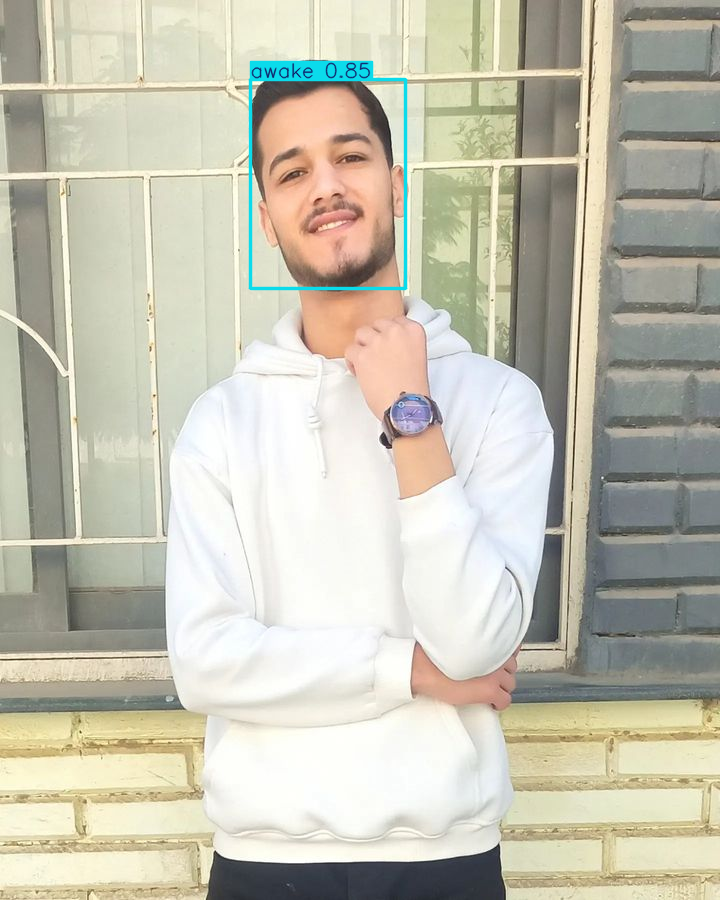

In [21]:
results = final_model('/kaggle/input/image-for-predict')
results[0].show()

<hr>